## Customer Segmentation

customer segmentation is the division of the customers into discrete groups that reflect similarity among customers in each group.These common characteristics relevant to marketing which could be interests or spending habits, age or gender. Because dataset just provide information about sale transactions, I created the data frame with recency, frequency and total purchases (monetary value) features for each customer and used that for grouping customers.

This should include the date of the most recent order, number of orders placed over your selected time period (a year will work best), the total value of all purchases made in that time period

Recency: The value of how recently the customer purchased an item.
Frequency: The number of orders that customer placed in a certain period of time.
Total Purchases (Monetary Value): The value of how much customer spend in a certain period of time.

Here, I analyzed the transactions for an UK based online retailer over a period of one year (between 01/12/2010 and 09/12/2011).
First, I applied different dimentionaly reduction techniques (PCA, t-SNE,and UMAP) and plotting as scatter points in 3D dimension  to visualize the data. Then I used different clustering methods to achive highest silhouette score and best clustering performance. 

The link for the  Online Retail dataset is here: 

https://archive.ics.uci.edu/ml/datasets/online+retail

data contains 541909 observations and 8 columns. There are no missing values.

Attribute Information according to the UCI Machine Learnning Repository is as follows:

InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

Description: Product (item) name. Nominal.

Quantity: The quantities of each product (item) per transaction. Numeric.

InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.

UnitPrice: Unit price. Numeric, Product price per unit in sterling.

CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

Country: Country name. Nominal, the name of the country where each customer resides.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.mixture import GaussianMixture

In C:\Users\hamed\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\hamed\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\hamed\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\hamed\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\hamed\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

First, data is Imported:

In [2]:
data = pd.read_csv('E_Com_data.csv', encoding= 'unicode_escape')

# Exploratory Data Analysis

In [3]:
data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
data.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900,4070,4223,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,10/31/2011 14:41,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
# column names are converted to lower case for ease of use.
data.columns = data.columns.str.lower()

In [7]:
# The number of unique values for  categorical features are determined 
data.nunique()

invoiceno      25900
stockcode       4070
description     4223
quantity         722
invoicedate    23260
unitprice       1630
customerid      4372
country           38
dtype: int64

In [8]:
#There are 541909 rows and 8 columns.
len(data)

541909

In [9]:
len(data.columns)

8

In [10]:
#Here is the column names.
data.columns

Index(['invoiceno', 'stockcode', 'description', 'quantity', 'invoicedate',
       'unitprice', 'customerid', 'country'],
      dtype='object')

In [11]:
#total number of entries with null value.
data.isnull().sum()

invoiceno           0
stockcode           0
description      1454
quantity            0
invoicedate         0
unitprice           0
customerid     135080
country             0
dtype: int64

In [12]:
#total number of entries with null value (in percent).
(data.isnull().sum()/len(data))*100

invoiceno       0.000000
stockcode       0.000000
description     0.268311
quantity        0.000000
invoicedate     0.000000
unitprice       0.000000
customerid     24.926694
country         0.000000
dtype: float64

In [13]:
#there are many entries with null customer ids that can not be assigned to the customers. 
#the rows with null values are dropped from the dataset. 
data.dropna(inplace=True)

In [14]:
data.isnull().sum()

invoiceno      0
stockcode      0
description    0
quantity       0
invoicedate    0
unitprice      0
customerid     0
country        0
dtype: int64

In [15]:
#number of duplicated entries
data.duplicated().sum()

5225

In [16]:
#duplicated entries are dropped.
data.drop_duplicates(inplace=True)

In [17]:
#There are also returned items in which the invoice no starts with "C" and
#the value for "quantity" is negative
data[data['quantity'] < 0].head(3)

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom


In [18]:
#Number of the returned items 
len(data[data['quantity'] < 0])

8872

In [19]:
# the returned transactions are removed from the data as they are not useful in our analysis
data =  data[data['quantity'] > 0]

In [20]:
#We can check to make sure there is no  return transaction
len(data[data['invoiceno'].str.startswith('c')])

0

In [21]:
#Total number of entries after data cleaning and omition of null and duplicated values.
len(data)

392732

In [22]:
#I created a table to show the number of products, total number of invoices and number of customers
pd.DataFrame([{'number of products': len(data['stockcode'].value_counts()),    
               'number of invoces': len(data['invoiceno'].value_counts()),
               'number of customers': len(data['customerid'].value_counts()),  
              }], columns = ['number of products', 'number of transactions', 'number of customers'], index = ['quantity'])

,number of products,number of transactions,number of customers
quantity,3665,NaN,4339


In [23]:
# a new feature vaariable is created to represents the total amount for each invoice.
data['total_amount'] = data['quantity'] * data['unitprice']

In [24]:
data.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,total_amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


Two feature variables'total_purchases' and 'frequency were created as shown below:

In [25]:
df_total_invoice = pd.DataFrame(data.groupby(by=['customerid','invoiceno'])['total_amount'].sum())

In [26]:
df_total_invoice.head()

total_amount
customerid invoiceno              
12346.0    541431         77183.60
12347.0    537626           711.79
           542237           475.39
           549222           636.25
           556201           382.52

In [27]:
df_temp_frequency_monetary = df_total_invoice.groupby(by='customerid')['total_amount'].agg(['count','sum'])

To create the recency feature, I used the first date as reference date and recency variable is the number of days after the reference date. Hence higher value indicate more recent transaction.

In [28]:
data['invoicedate'] = pd.to_datetime(data['invoicedate'] ) 
first_day = data['invoicedate'].min()
first_day = first_day.date()

In [29]:
temp_date = pd.DataFrame(data.groupby(by='customerid')['invoicedate'].max())

In [30]:
temp_recency = temp_date['invoicedate'].apply(lambda x:(x.date()-first_day))

two temporary data frame are merged to create recency_frequency_monetary data frame.

In [31]:
recency_frequency_monetary = pd.merge(temp_recency, df_temp_frequency_monetary,on='customerid')

In [32]:
# columns are renamed.
recency_frequency_monetary.columns = ['recency','frequency','total_purchases']

In [33]:
recency_frequency_monetary.head()

,recency,frequency,total_purchases
customerid,,,
12346.0,48 days,1,77183.60
12347.0,371 days,7,4310.00
12348.0,298 days,4,1797.24
12349.0,355 days,1,1757.55
12350.0,63 days,1,334.40


In [34]:
#get days attribute from recency column and convert it to int:
recency_frequency_monetary['recency'] = recency_frequency_monetary['recency'].dt.days.astype(int)

In [35]:
recency_frequency_monetary.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4339 entries, 12346.0 to 18287.0
Data columns (total 3 columns):
recency            4339 non-null int32
frequency          4339 non-null int64
total_purchases    4339 non-null float64
dtypes: float64(1), int32(1), int64(1)
memory usage: 118.6 KB


In [36]:
recency_frequency_monetary.describe()

,recency,frequency,total_purchases
count,4339.000000,4339.000000,4339.000000
mean,280.958516,4.271952,2048.215924
std,100.007757,7.705493,8984.248352
min,0.000000,1.000000,0.000000
25%,231.500000,1.000000,306.455000
50%,323.000000,2.000000,668.560000
75%,356.000000,5.000000,1660.315000
max,373.000000,210.000000,280206.020000


# Visualization

To better understand the relationship between the variable features, 2D and 3D plots are drawn.

<AxesSubplot:xlabel='recency', ylabel='frequency'>

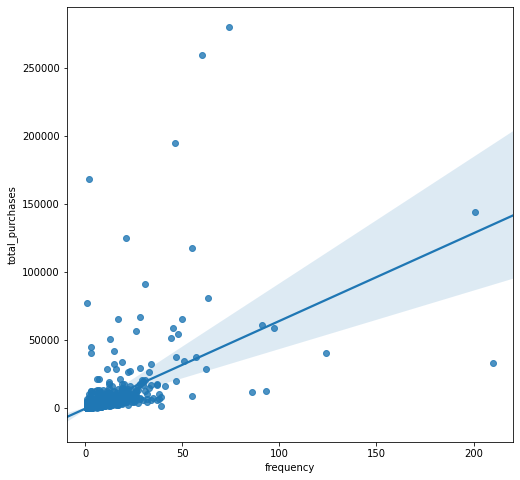

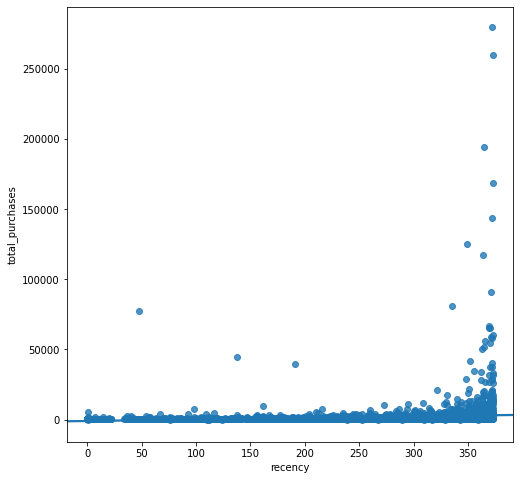

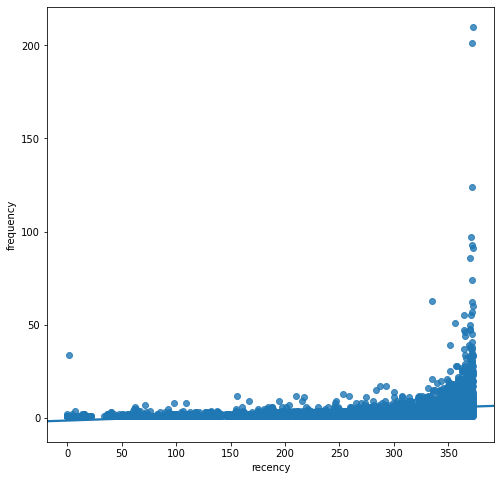

In [37]:
#frequency vs total purchases
plt.figure(figsize=(8,8))
sns.regplot(x = recency_frequency_monetary['frequency'], y = recency_frequency_monetary['total_purchases'])
#recency vs total purchases
plt.figure(figsize=(8,8))
sns.regplot(x = recency_frequency_monetary['recency'], y = recency_frequency_monetary['total_purchases'])
#recency vs frequency
plt.figure(figsize=(8,8))
sns.regplot(x = recency_frequency_monetary['recency'], y = recency_frequency_monetary['frequency'])

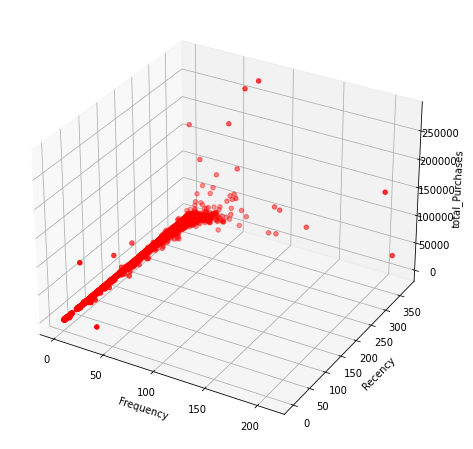

In [38]:
#drawing 3D plot

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

x =recency_frequency_monetary['frequency']
z =recency_frequency_monetary['total_purchases']
y =recency_frequency_monetary['recency']

ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('Frequency')
ax.set_ylabel('Recency')
ax.set_zlabel('total_Purchases')

plt.show()

From 2D and 3D plots can be concluded that there is a correlation between different features and customers with higher frequencey and more recency also spend more money.

Before  applying different models, standardizing and having all feature variables in same scale is required.

In [39]:
X_ = recency_frequency_monetary

In [40]:
scaler = StandardScaler()

In [41]:
X_scaled_ = scaler.fit_transform(X_)

Applying feature reduction using different models for 2D visualization of data set.

In [42]:
#PCA
pca = PCA(n_components=2)

In [43]:
X_pca = pca.fit_transform(X_scaled_)

In [44]:
pca.explained_variance_ratio_.sum()

0.8573810476281027

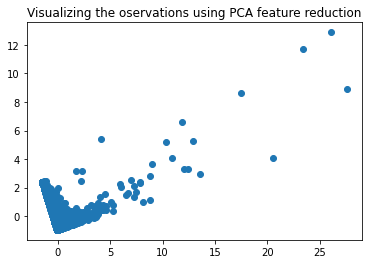

In [45]:
plt.scatter(x=X_pca[:,0],y=X_pca[:,1])
plt.title('Visualizing the oservations using PCA feature reduction')
plt.show()

From the visualization, it can be concluded that data could be divided to two clusters.

# t-SNE Visualization

Visualization for Perplexity = 5


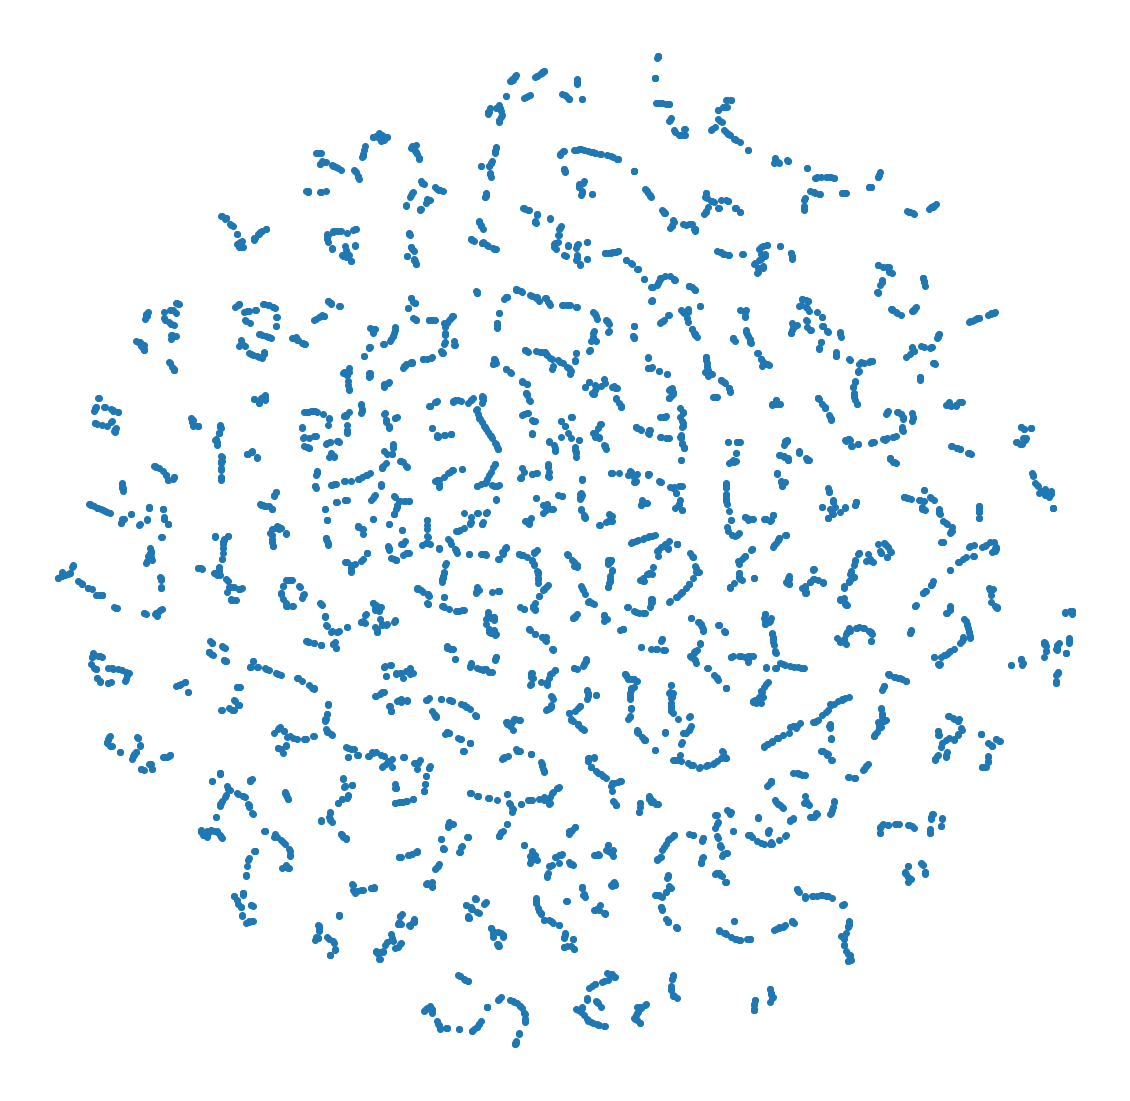

Visualization for Perplexity = 10


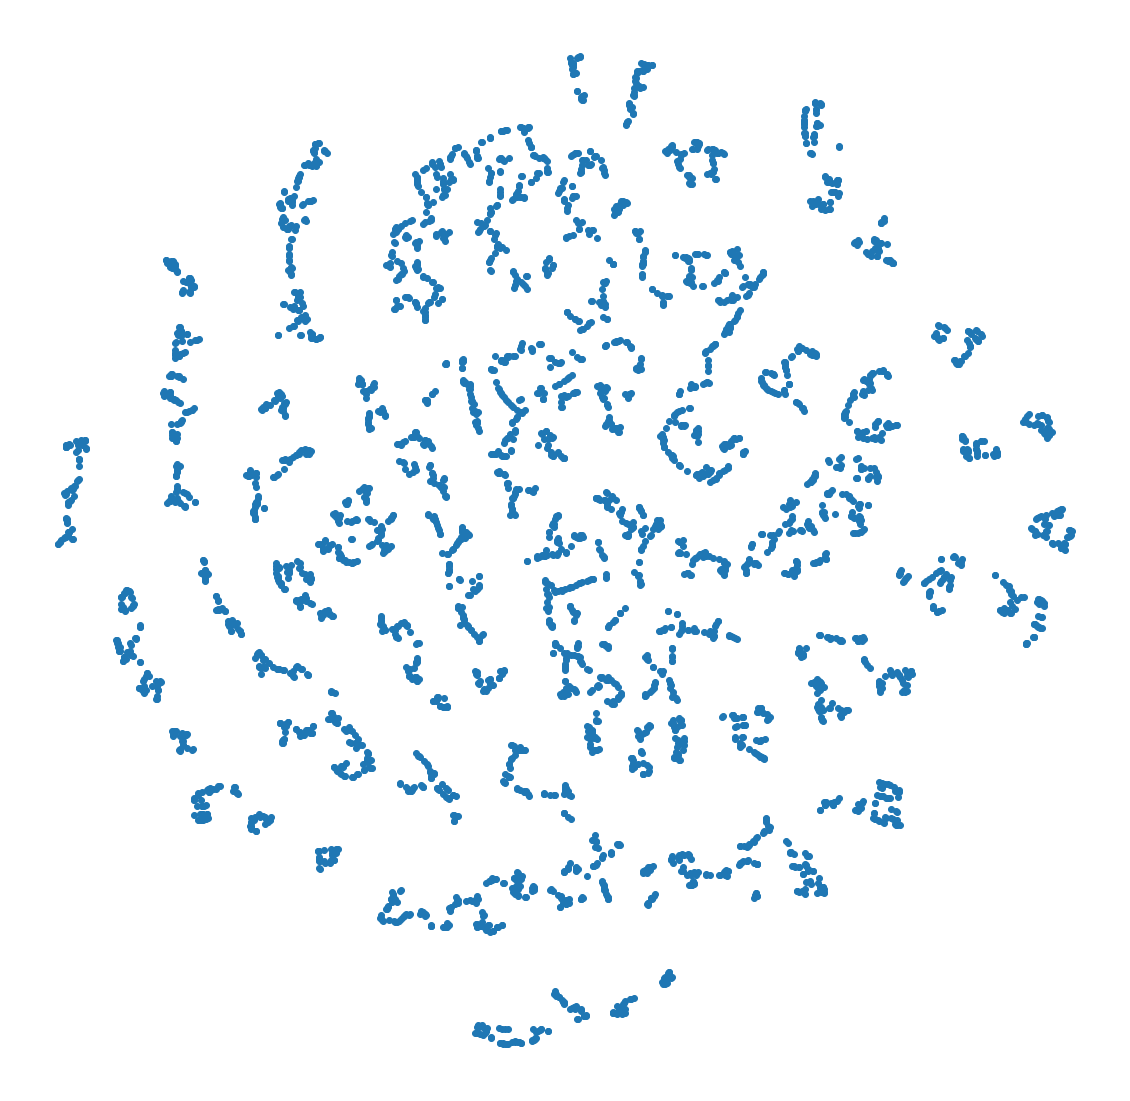

Visualization for Perplexity = 20


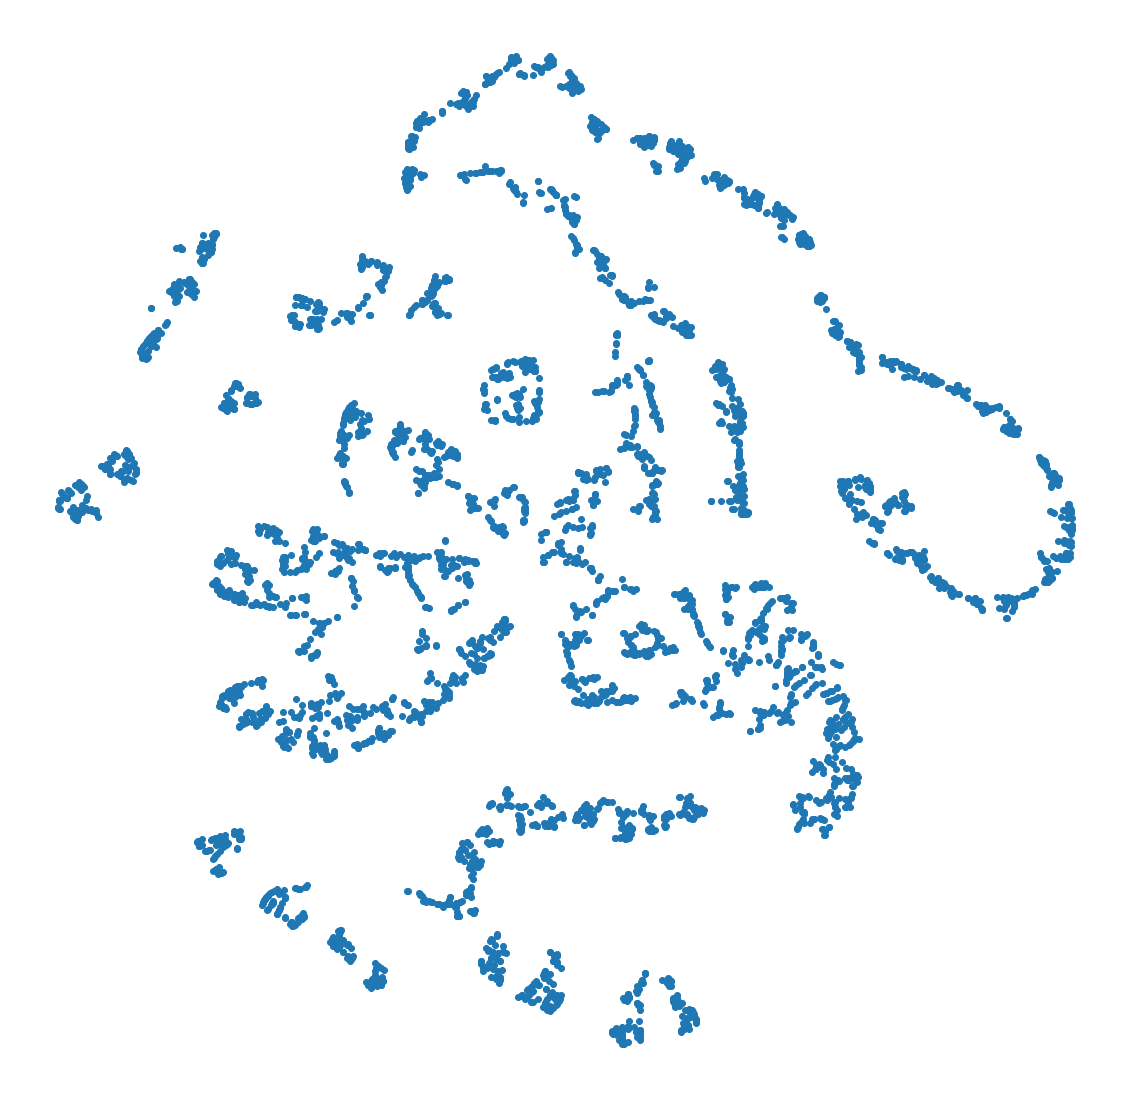

Visualization for Perplexity = 30


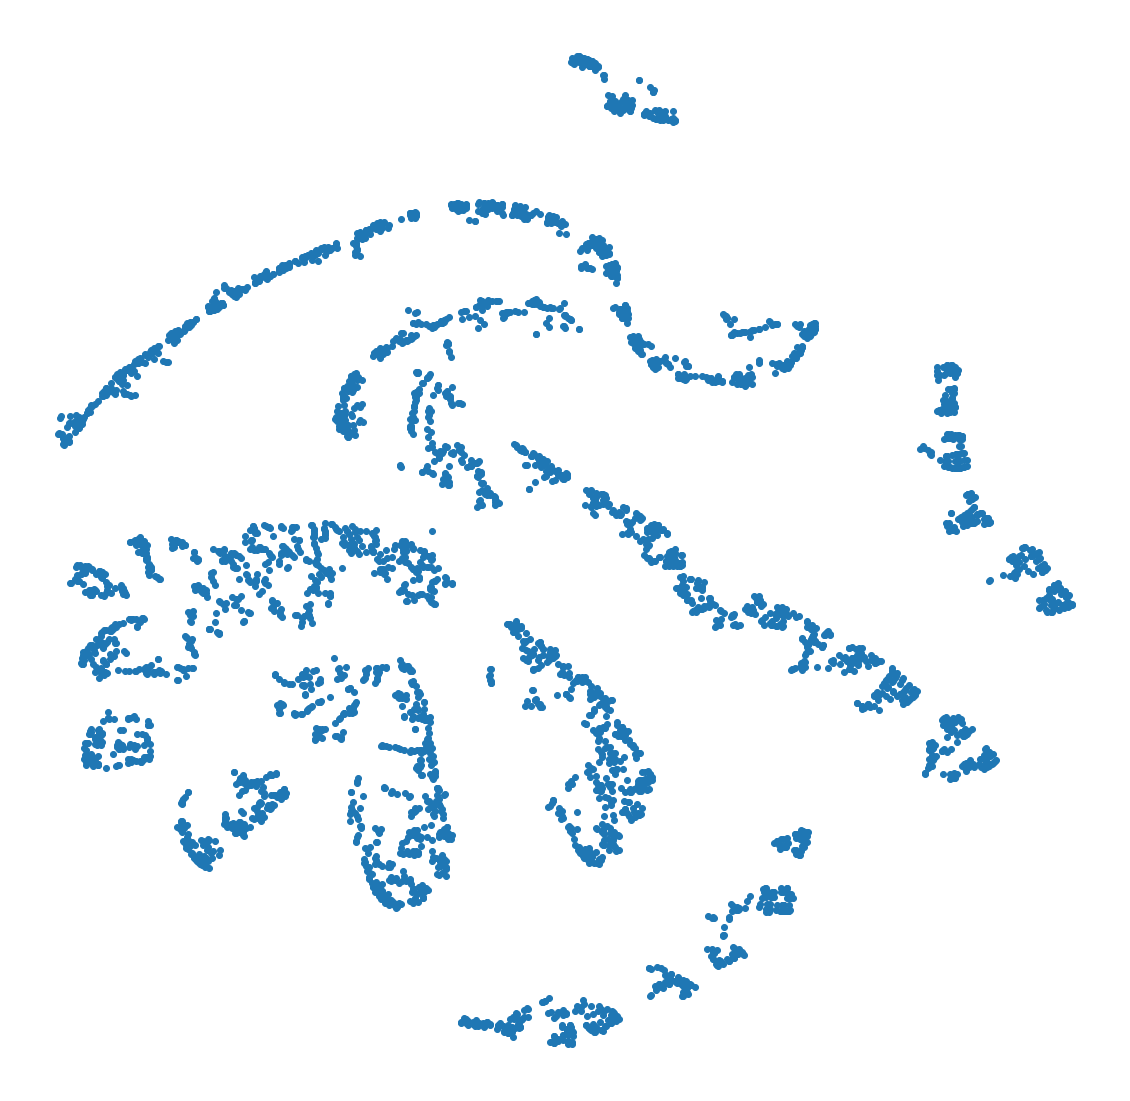

Visualization for Perplexity = 40


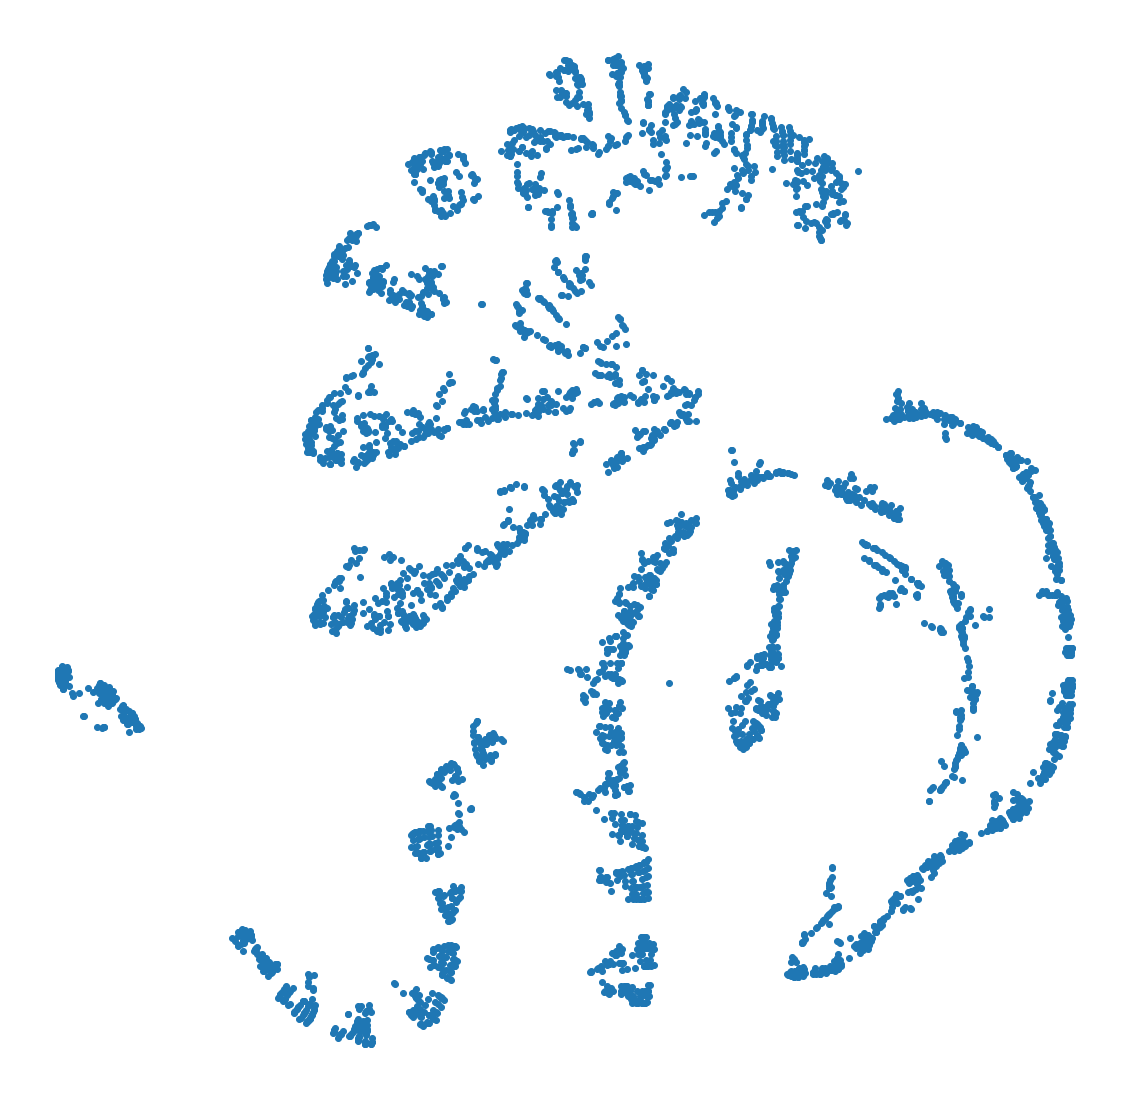

Visualization for Perplexity = 50


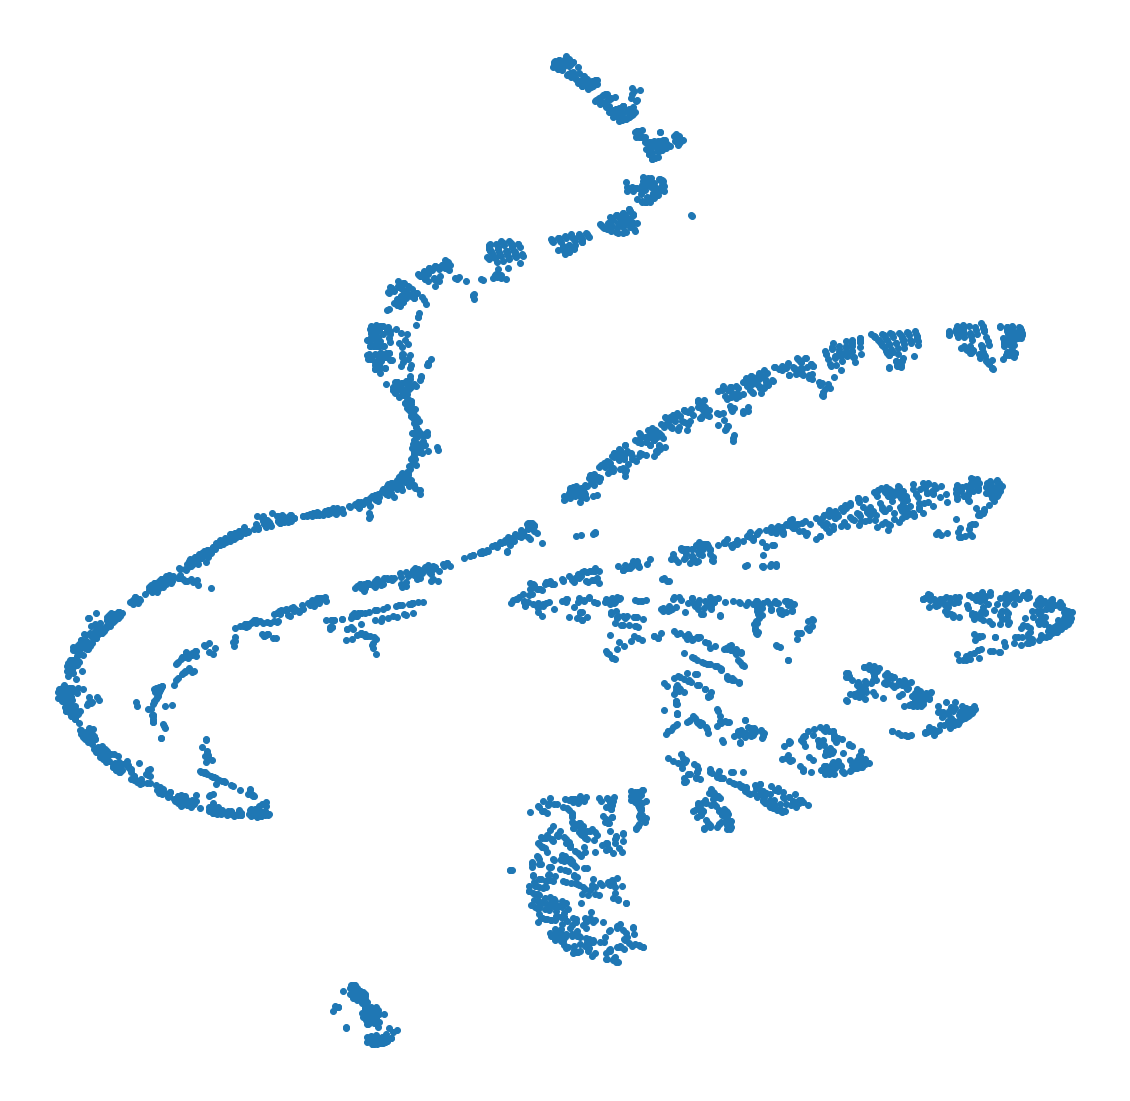

In [46]:
#t-SNE feature reduction using different perplexities and visualization
for i in [5,10,20,30,40,50]:
    tsne = TSNE(n_components=2, perplexity=i)
    tsne_results = tsne.fit_transform(X_scaled_)
    print('Visualization for Perplexity = {}'.format(i))
    plt.figure(figsize=(20,20))
    plt.scatter(tsne_results[:,0],tsne_results[:,1])
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.show()

# Visualization UMAP

Visualization using UMAP feature reduction


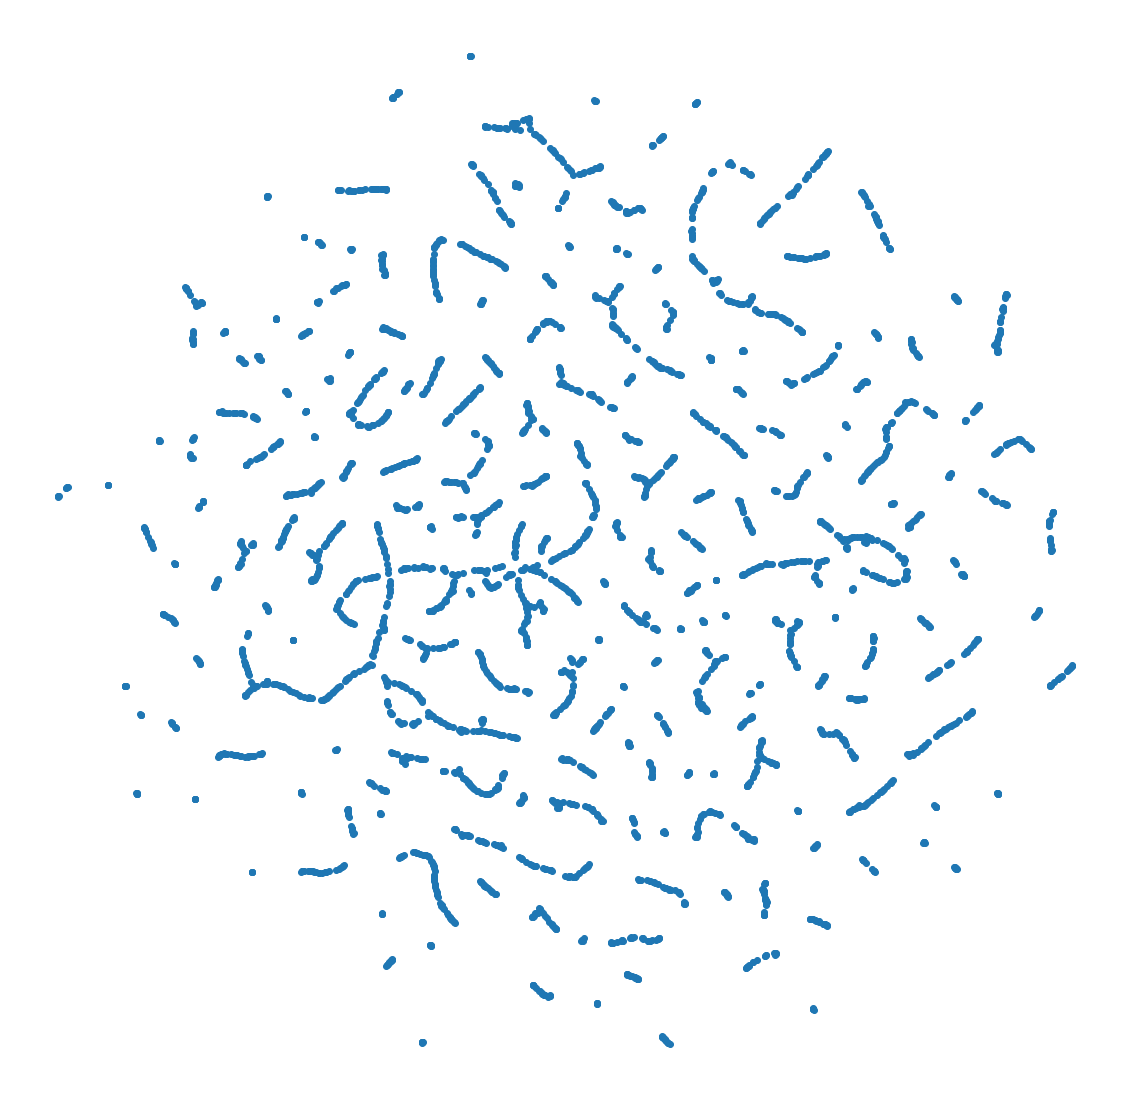

In [47]:
#Feature reduction using UMAP and visualization
umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X_scaled_)
print('Visualization using UMAP feature reduction')
plt.figure(figsize=(20,20))
plt.scatter(umap_results[:,0],umap_results[:,1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

Best Visualization obtained usig PCA that showed data points can be clustered into 2 groups.

# Customer segmentation using kmeans

In [48]:
# kmeans clustering using different number of clusters and comparision of silhouette scores.
kmeans_sil_score = []
kmeans_inertia = []
kmeans_preds = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k,n_init=100)
    pred = kmeans.fit_predict(X_scaled_)
    sil_score = silhouette_score(X_scaled_,pred)
    print('Silhouette score for n_clusters ={} is {}'.format(k,sil_score))
    kmeans_sil_score.append(sil_score)
    kmeans_inertia.append(kmeans.inertia_)
    kmeans_preds.append(pred)

Silhouette score for n_clusters =2 is 0.895861130921858
Silhouette score for n_clusters =3 is 0.5939067793903986
Silhouette score for n_clusters =4 is 0.6165245477806142
Silhouette score for n_clusters =5 is 0.6166088661672099
Silhouette score for n_clusters =6 is 0.5962857086038267
Silhouette score for n_clusters =7 is 0.5170304653932274
Silhouette score for n_clusters =8 is 0.4773897531674839
Silhouette score for n_clusters =9 is 0.49133663822660995
Silhouette score for n_clusters =10 is 0.4780000005109906


Elbow plot using inertia calculations

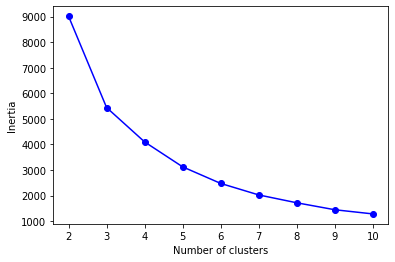

In [49]:
plt.plot(range(2,11),kmeans_inertia,'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

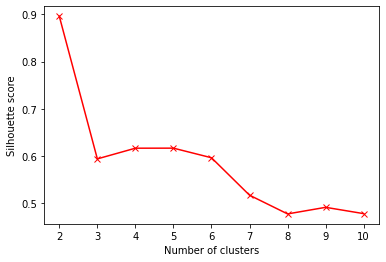

In [50]:
plt.plot(range(2,11),kmeans_sil_score,'rx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

Silhouette score vs K number plot shows that maximum silhouette score can be obtained with 2 clusters, while elbow plot suggests higher number of clusters. 

Visualization of KMeans cluster predictions using 3D plots and PCA feature reduction:

the K number is 2


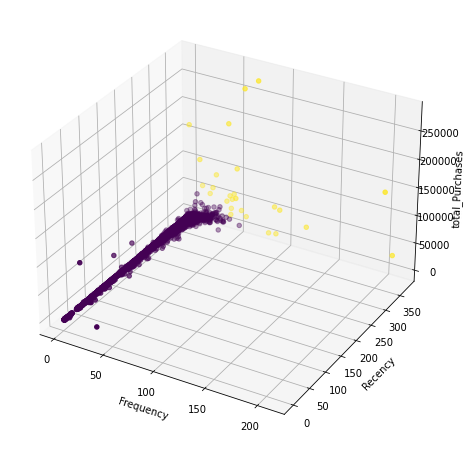

the K number is 3


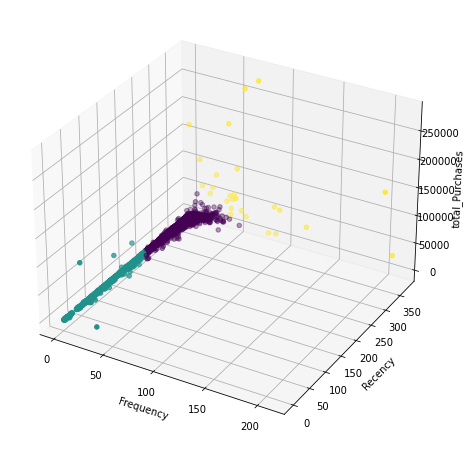

the K number is 4


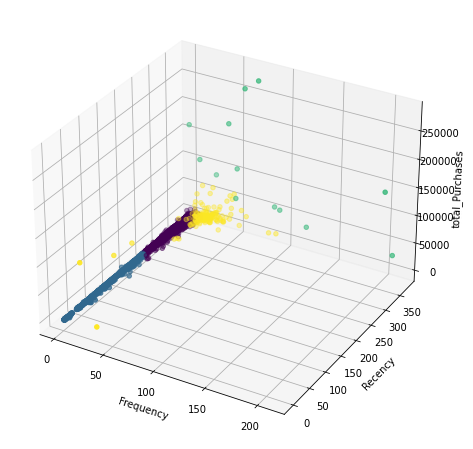

the K number is 5


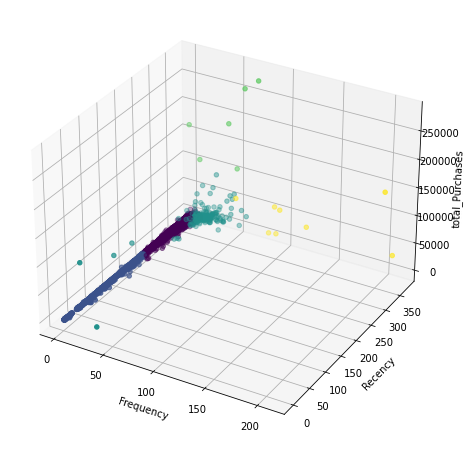

the K number is 6


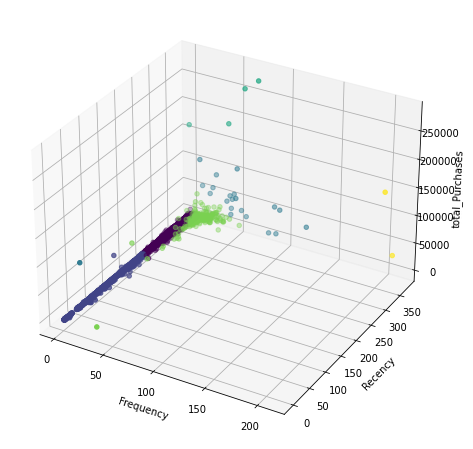

the K number is 7


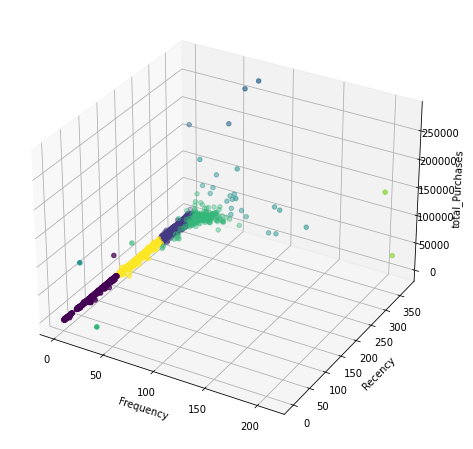

the K number is 8


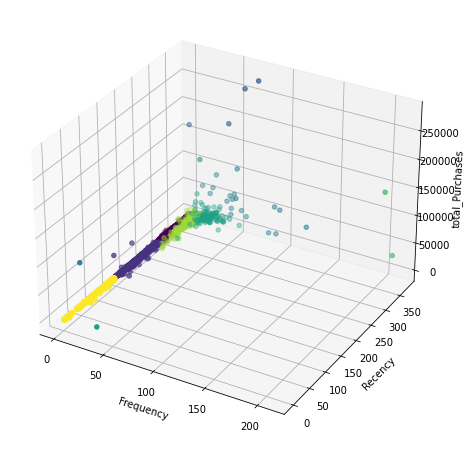

the K number is 9


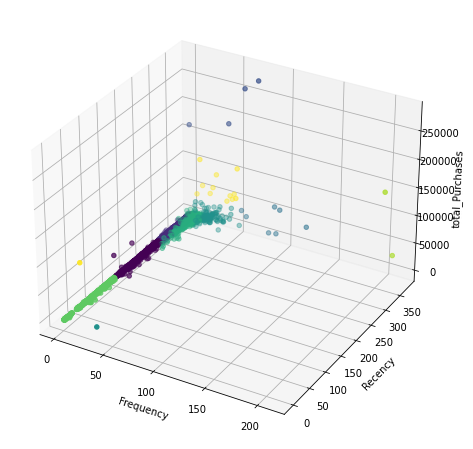

the K number is 10


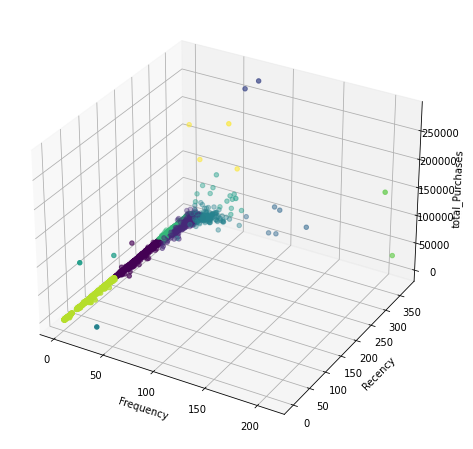

In [51]:
#3D visualization for kmeans clustering using different number of clusters
for i in range (9):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection='3d')

    x =recency_frequency_monetary['frequency']
    z =recency_frequency_monetary['total_purchases']
    y =recency_frequency_monetary['recency']

    ax.scatter(x, y, z, c = kmeans_preds[i], marker='o')

    ax.set_xlabel('Frequency')
    ax.set_ylabel('Recency')
    ax.set_zlabel('total_Purchases')
    print('the K number is {}'.format(i+2))
    plt.show()

the K number is 2


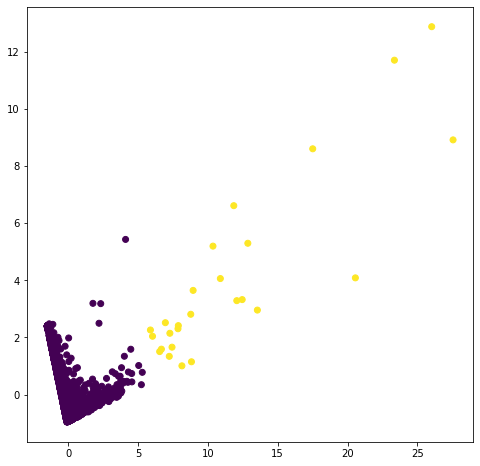

the K number is 3


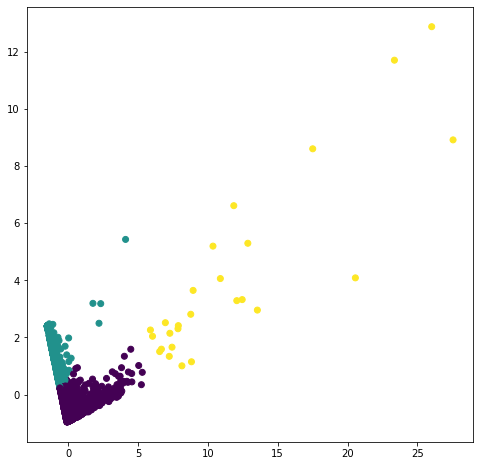

the K number is 4


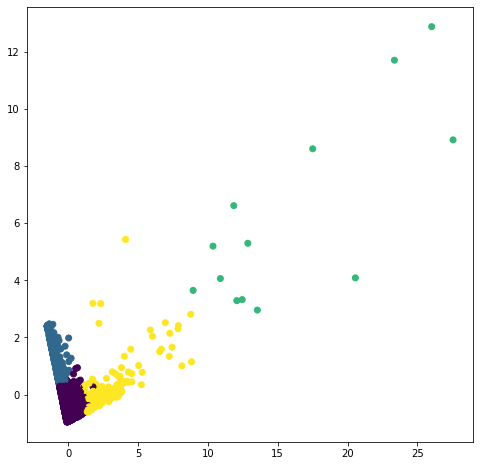

the K number is 5


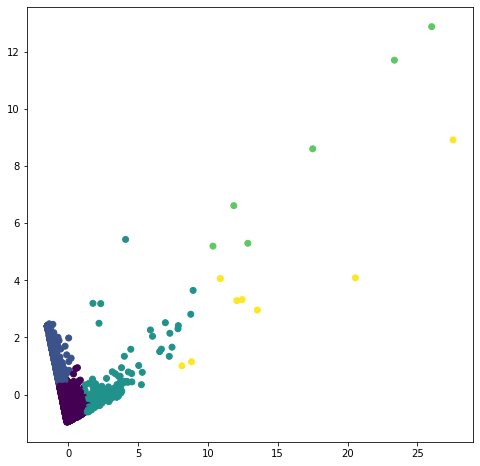

the K number is 6


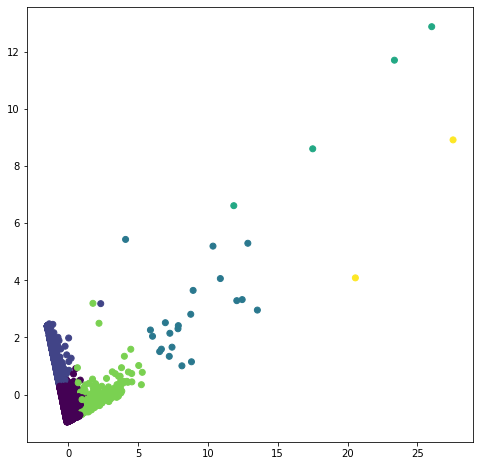

the K number is 7


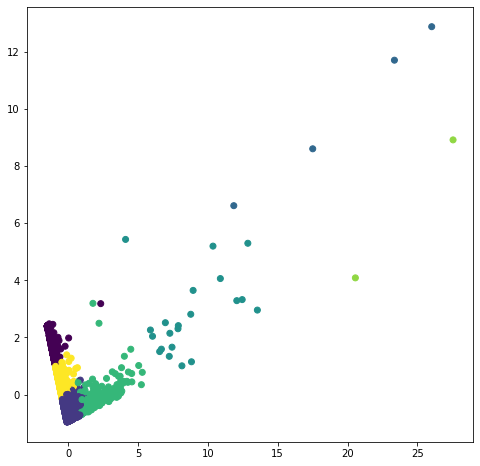

the K number is 8


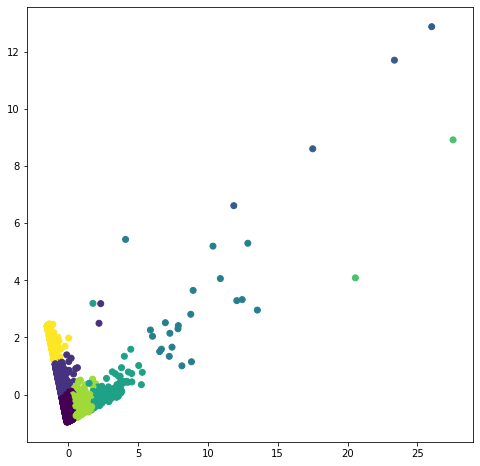

the K number is 9


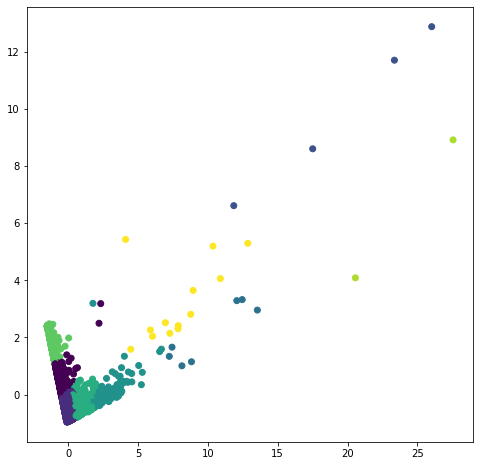

the K number is 10


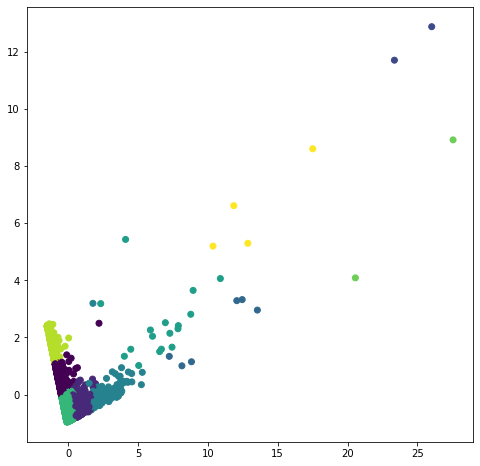

In [52]:
##2D visualization for kmeans clustering using different number of clusters (PCA feature reduction is applied.)
for i in range (9):
    plt.figure(figsize=(8,8))
    plt.scatter(x=X_pca[:,0],y=X_pca[:,1],c = kmeans_preds[i])
    print('the K number is {}'.format(i+2))
    plt.show()

# hierarchical clustering

The linkage method is ward


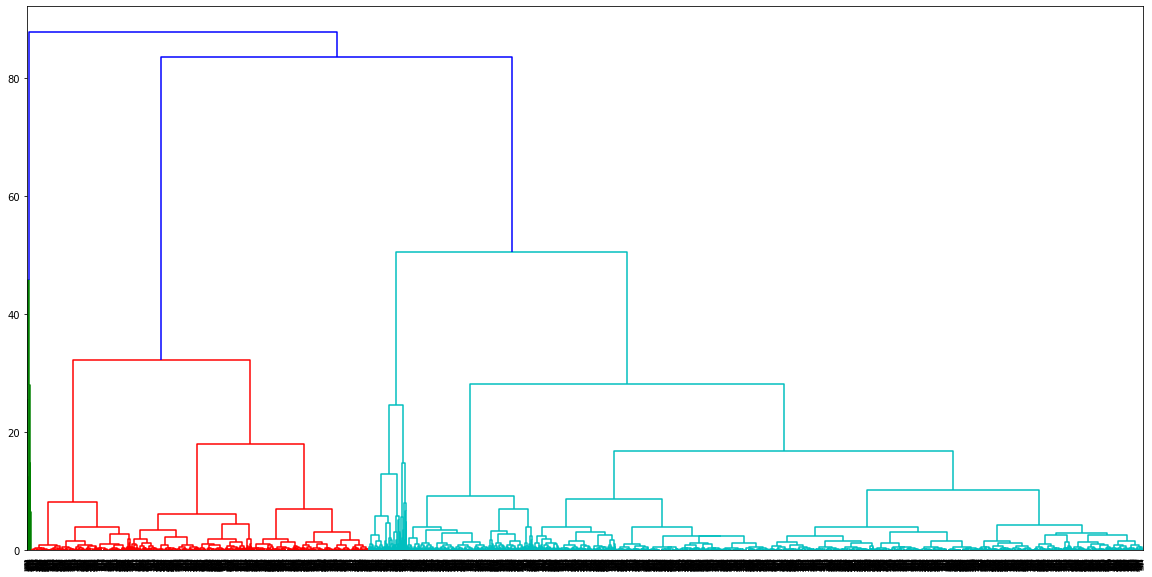

The linkage method is complete


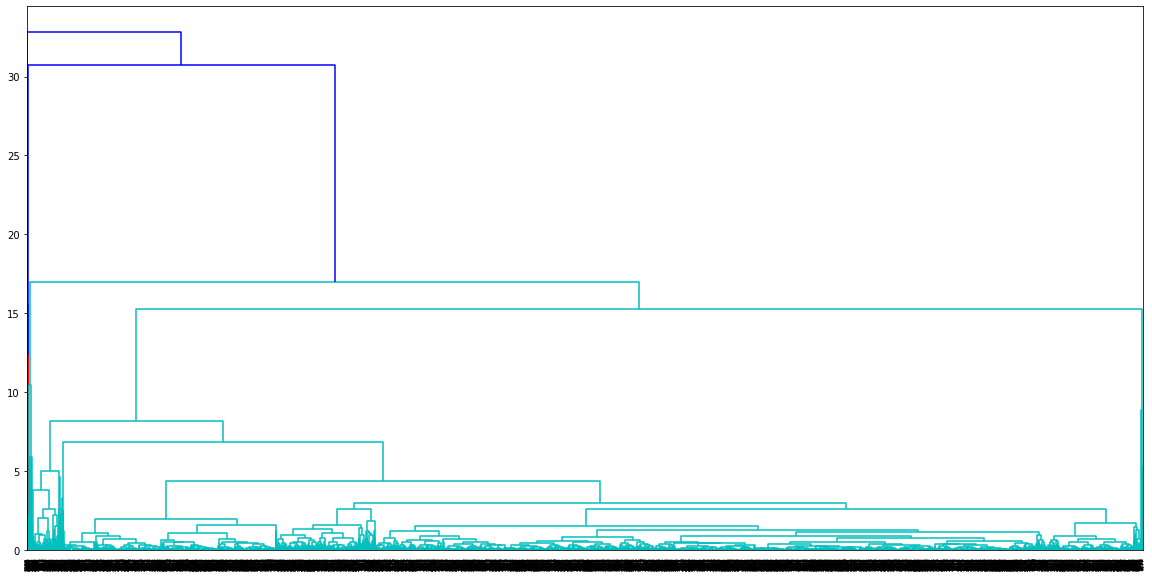

The linkage method is average


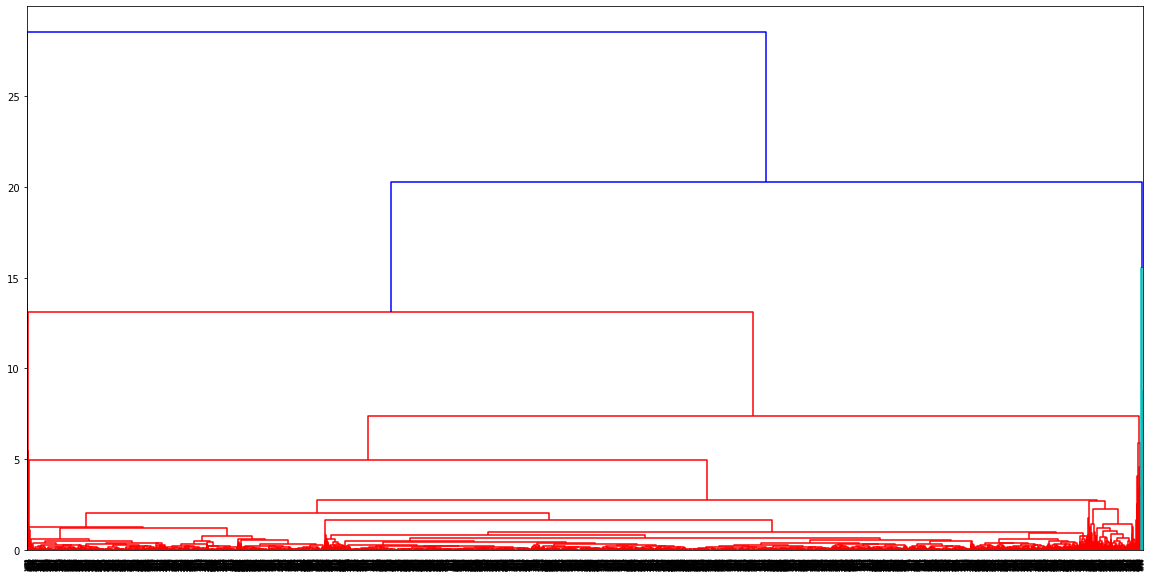

In [53]:
##visualization for hierarchical clustering using different linkage method

linkages = ['ward', 'complete','average']
for i in linkages:
    print('The linkage method is {}'.format(i))
    plt.figure(figsize=(20,10))
    dendrogram(linkage(X_scaled_, method=i))
    plt.show()

In [54]:
#Calculation of silhouette score for hierarchical clustering using different number of clusters
agg_preds = []
for k in range(2,6):
    cluster = AgglomerativeClustering(n_clusters=k,linkage='ward')
    agg_preds.append(cluster.fit_predict(X_scaled_))

In [55]:
for i in range (4):
    print ('silhouette score for {} clusters is {}'.format(i+2,
            silhouette_score(X_scaled_,agg_preds[i])))

silhouette score for 2 clusters is 0.9199425189770076
silhouette score for 3 clusters is 0.553231863094941
silhouette score for 4 clusters is 0.5821270064609414
silhouette score for 5 clusters is 0.5829628516897962


the cluster number is 2


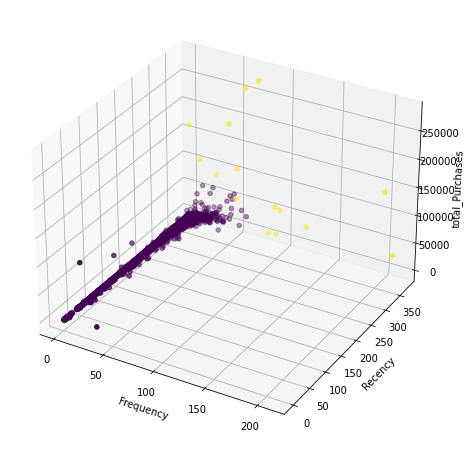

the cluster number is 3


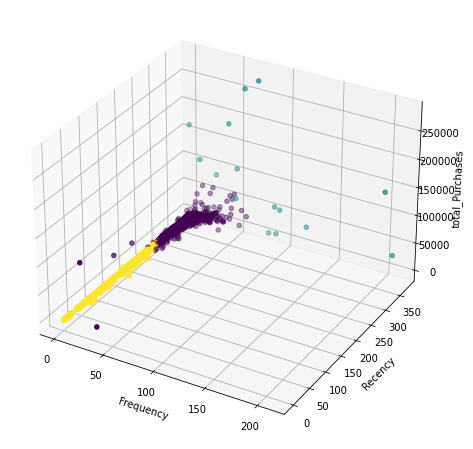

the cluster number is 4


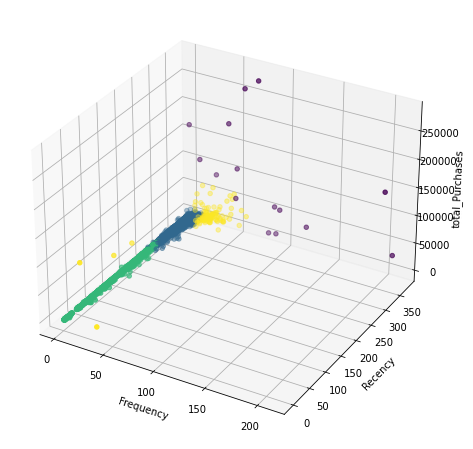

the cluster number is 5


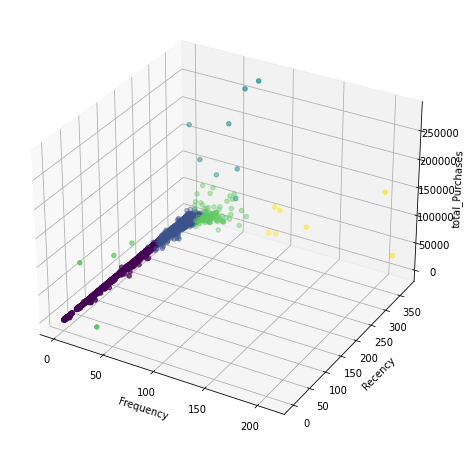

In [56]:
#3D visualization for hierarchical clustering using different number of clusters

for i in range (4):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection='3d')

    x =recency_frequency_monetary['frequency']
    z =recency_frequency_monetary['total_purchases']
    y =recency_frequency_monetary['recency']

    ax.scatter(x, y, z, c = agg_preds[i], marker='o')

    ax.set_xlabel('Frequency')
    ax.set_ylabel('Recency')
    ax.set_zlabel('total_Purchases')
    print('the cluster number is {}'.format(i+2))
    plt.show()

the K number is 2


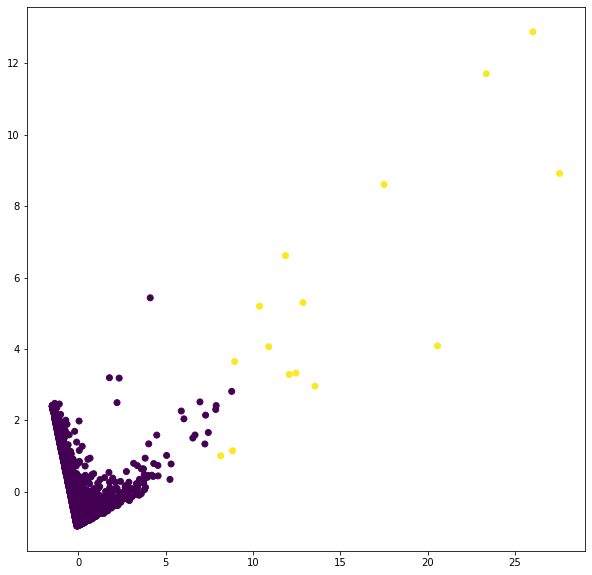

the K number is 3


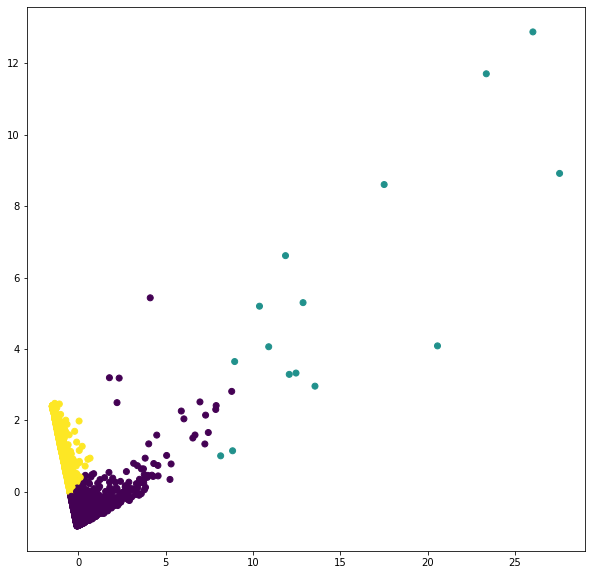

the K number is 4


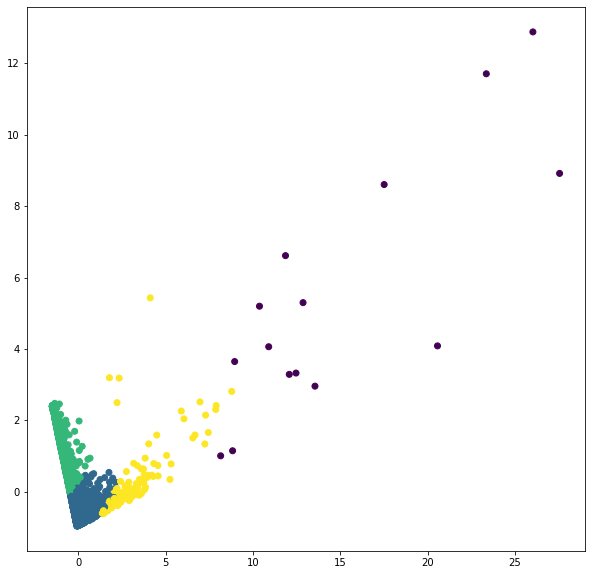

the K number is 5


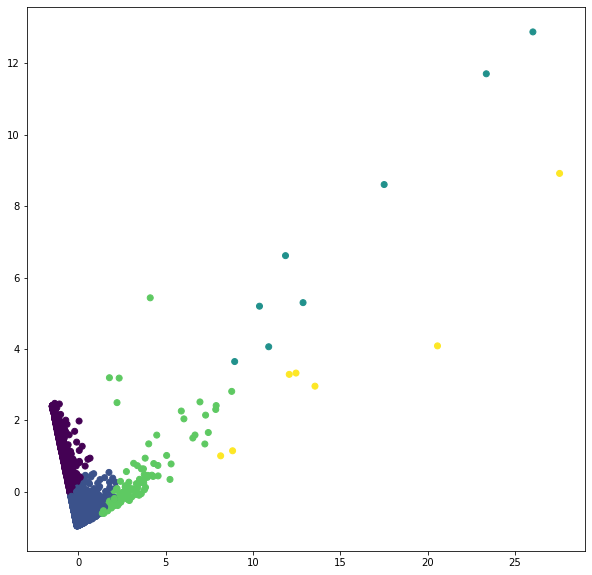

In [57]:
#2D visualization for hierarchical clustering using different number of clusters (PCA method is applied.)

for i in range (4):
    plt.figure(figsize=(10,10))
    plt.scatter(x=X_pca[:,0],y=X_pca[:,1],c = agg_preds[i])
    print('the K number is {}'.format(i+2))
    plt.show()

# DBSCAN

In [58]:
#Calculation of silhouette score for hierarchical clustering using different number of epsilon and minimum samples.

for i in range(1,10):
    for k in [0.5,1,2,3,4,5,6,7,8,9,10]:
        dbscan = DBSCAN(eps=k,min_samples=i,metric='euclidean')
        pred = dbscan.fit_predict(X_scaled_)
        print('the silhouette score for min_samples = {} and eps = {} is {}'.
              format(i, k, silhouette_score(X_scaled_,pred)))

the silhouette score for min_samples = 1 and eps = 0.5 is 0.20934615072988902
the silhouette score for min_samples = 1 and eps = 1 is 0.6991274905405184
the silhouette score for min_samples = 1 and eps = 2 is 0.6950185821254536
the silhouette score for min_samples = 1 and eps = 3 is 0.7047028424643451
the silhouette score for min_samples = 1 and eps = 4 is 0.8882458491267516
the silhouette score for min_samples = 1 and eps = 5 is 0.919658665112158
the silhouette score for min_samples = 1 and eps = 6 is 0.9316323129296197
the silhouette score for min_samples = 1 and eps = 7 is 0.9435676614763224
the silhouette score for min_samples = 1 and eps = 8 is 0.9428866175580318
the silhouette score for min_samples = 1 and eps = 9 is 0.9428866175580318
the silhouette score for min_samples = 1 and eps = 10 is 0.9428866175580318
the silhouette score for min_samples = 2 and eps = 0.5 is 0.27302012241246787
the silhouette score for min_samples = 2 and eps = 1 is 0.7076452415475094
the silhouette scor

In [59]:
# calculation of number of clusters for different number of epsilon
clusters = []
df = {}

for i in range(1,10):
    dbscan = DBSCAN(eps=i,min_samples=3,metric='euclidean')
    cluster = dbscan.fit_predict(X_scaled_)
    clusters.append(cluster)
    df[str(i)] = clusters[i-1]
    

df_eps = pd.DataFrame(df)

for i in range (1,10):
    print('the number of unique clusters for eps = {} is {}'.
         format(i, df_eps[str(i)].nunique() ))

the number of unique clusters for eps = 1 is 4
the number of unique clusters for eps = 2 is 2
the number of unique clusters for eps = 3 is 2
the number of unique clusters for eps = 4 is 2
the number of unique clusters for eps = 5 is 2
the number of unique clusters for eps = 6 is 2
the number of unique clusters for eps = 7 is 2
the number of unique clusters for eps = 8 is 2
the number of unique clusters for eps = 9 is 2


In [60]:
# calculation of number of clusters for different number of minimum samples
clusters = []
df = {}

for i in range(1,10):
    dbscan = DBSCAN(eps=1,min_samples=i,metric='euclidean')
    cluster = dbscan.fit_predict(X_scaled_)
    clusters.append(cluster)
    df[str(i)] = clusters[i-1]
    

df_min_samples = pd.DataFrame(df)

for i in range (1,10):
    print('the number of unique clusters for min_samples = {} is {}'.
         format(i, df_min_samples[str(i)].nunique() ))

the number of unique clusters for min_samples = 1 is 25
the number of unique clusters for min_samples = 2 is 8
the number of unique clusters for min_samples = 3 is 4
the number of unique clusters for min_samples = 4 is 3
the number of unique clusters for min_samples = 5 is 2
the number of unique clusters for min_samples = 6 is 2
the number of unique clusters for min_samples = 7 is 2
the number of unique clusters for min_samples = 8 is 2
the number of unique clusters for min_samples = 9 is 2


the eps number is 8 and min_samples are 3


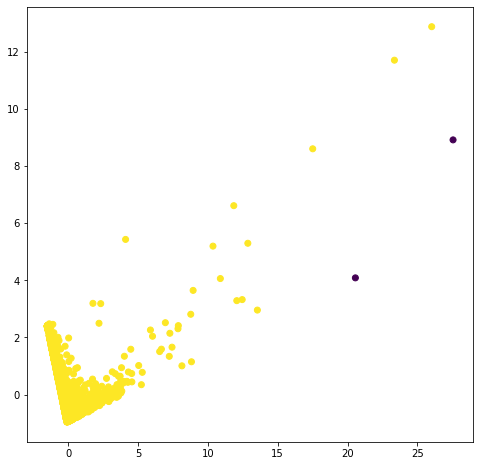

the number of clusters is 2


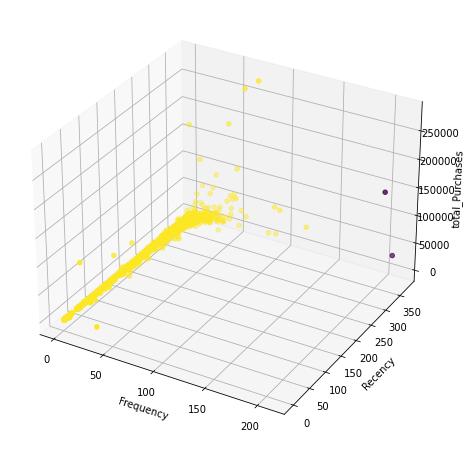

In [61]:
#2D and 3D visualization for DBSCAN model
dbscan = DBSCAN(eps=8,min_samples=3,metric='euclidean')
dbscan_pred = dbscan.fit_predict(X_scaled_)
plt.figure(figsize=(8,8))
plt.scatter(x=X_pca[:,0],y=X_pca[:,1],c = dbscan_pred)
print('the eps number is 8 and min_samples are 3')
plt.show()

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

x =recency_frequency_monetary['frequency']
z =recency_frequency_monetary['total_purchases']
y =recency_frequency_monetary['recency']

ax.scatter(x, y, z, c = dbscan_pred, marker='o')

ax.set_xlabel('Frequency')
ax.set_ylabel('Recency')
ax.set_zlabel('total_Purchases')
print('the number of clusters is {}'.format(2))
plt.show()

# GMM 

In [62]:
# calculation of silhouette score for GMM model using different number of clusters and different covariance types
covariance_types = ['full','tied','diag','spherical']
for i in range (2,10):
    for k in covariance_types:
        gmm = GaussianMixture(n_components=i,covariance_type=k)
        gmm_pred = gmm.fit_predict(X_scaled_)
        print ('silhouette score for components = {} and covariance type = {} is {}'.format(i,k, silhouette_score(X_scaled_,gmm_pred)))
        

silhouette score for components = 2 and covariance type = full is 0.409712757259556
silhouette score for components = 2 and covariance type = tied is 0.5646048707631303
silhouette score for components = 2 and covariance type = diag is 0.35502483740595364
silhouette score for components = 2 and covariance type = spherical is 0.547233016343506
silhouette score for components = 3 and covariance type = full is 0.5402723821210559
silhouette score for components = 3 and covariance type = tied is 0.5885453905708361
silhouette score for components = 3 and covariance type = diag is 0.16850893321839658
silhouette score for components = 3 and covariance type = spherical is 0.6022751343311633
silhouette score for components = 4 and covariance type = full is 0.1629430027923522
silhouette score for components = 4 and covariance type = tied is 0.5988731917333044
silhouette score for components = 4 and covariance type = diag is 0.14526364941016978
silhouette score for components = 4 and covariance typ

silhouette score for components = 2 and covariance type = full is 0.409712757259556
silhouette score for components = 3 and covariance type = full is 0.5402723821210559
silhouette score for components = 4 and covariance type = full is 0.1629430027923522
silhouette score for components = 5 and covariance type = full is 0.15318291940425158
silhouette score for components = 6 and covariance type = full is 0.08709125864906875
silhouette score for components = 7 and covariance type = full is 0.054885087637880164
silhouette score for components = 8 and covariance type = full is 0.019569958583445887
silhouette score for components = 9 and covariance type = full is 0.007191653018855612

the K number is 2


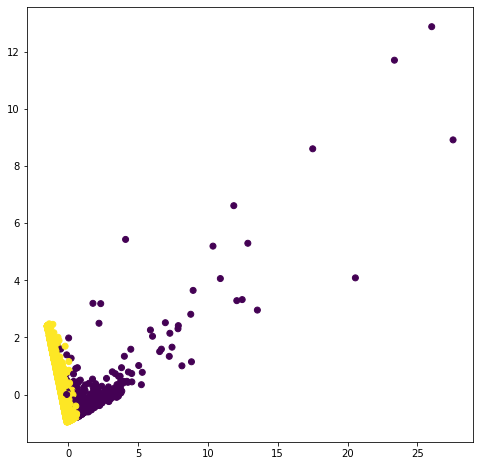


the K number is 3


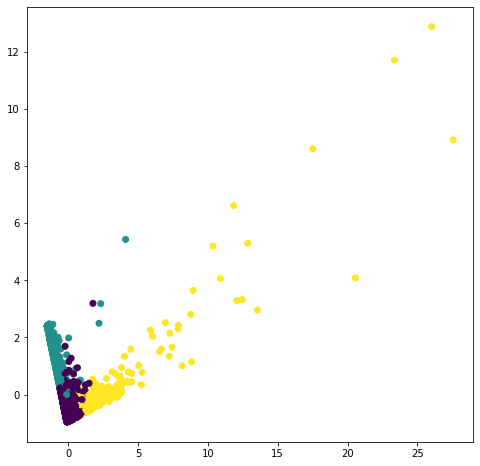


the K number is 4


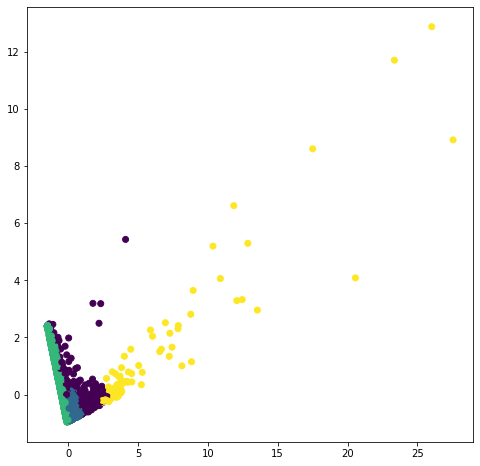


the K number is 5


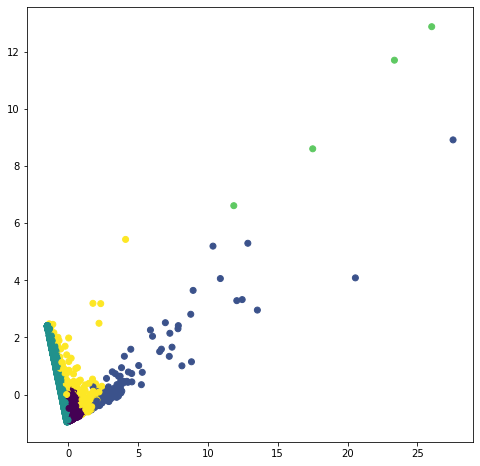


the K number is 6


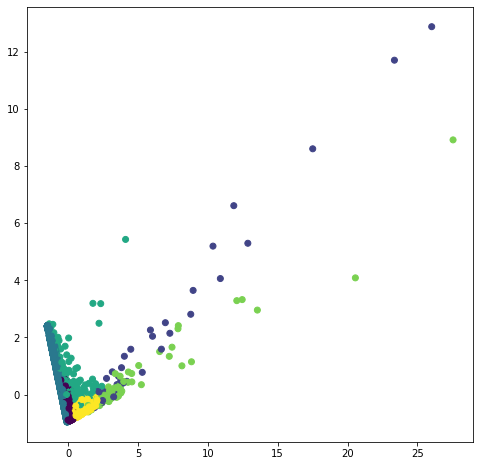


the K number is 7


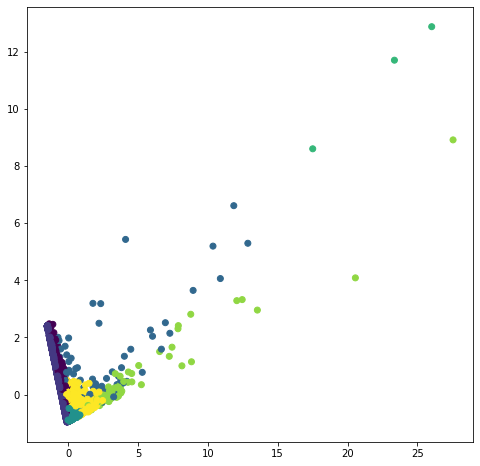


the K number is 8


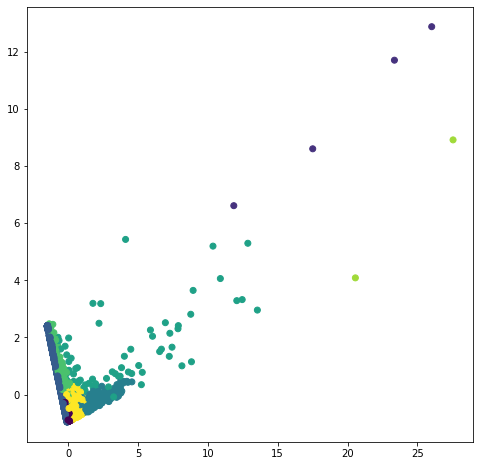


the K number is 9


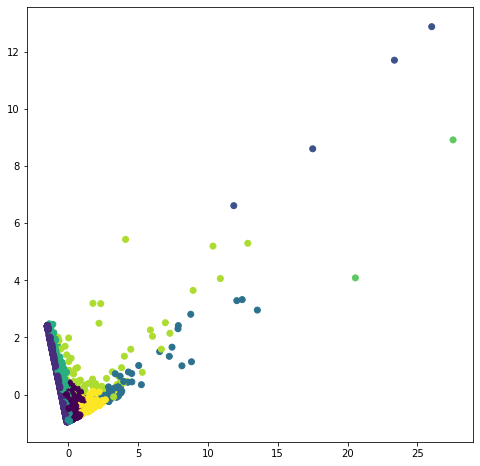

In [64]:
#2D visualization for GMM clustering using different number of clusters (PCA method is applied.)

gmm_preds = []
for i in range (2,10):
    gmm = GaussianMixture(n_components=i,covariance_type='full')
    gmm_pred = gmm.fit_predict(X_scaled_)
    gmm_preds.append(gmm_pred)
    print ('silhouette score for components = {} and covariance type = {} is {}'.format(i, 'full', silhouette_score(X_scaled_,gmm_pred)))
        
for i in range (8):
    plt.figure(figsize=(8,8))
    plt.scatter(x=X_pca[:,0],y=X_pca[:,1],c = gmm_preds[i])
    print()
    print('the K number is {}'.format(i+2))
    plt.show()

the number of clusters is 2


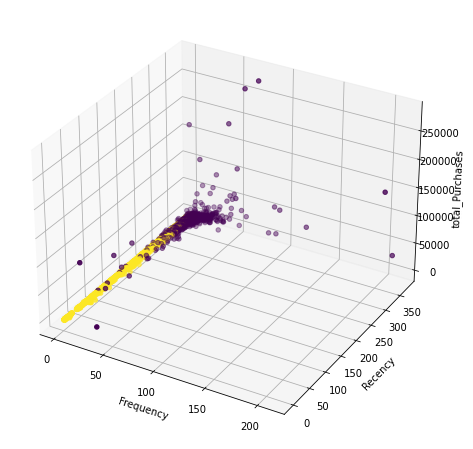

the number of clusters is 3


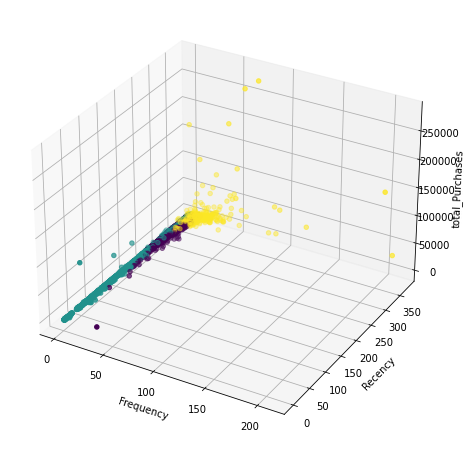

the number of clusters is 4


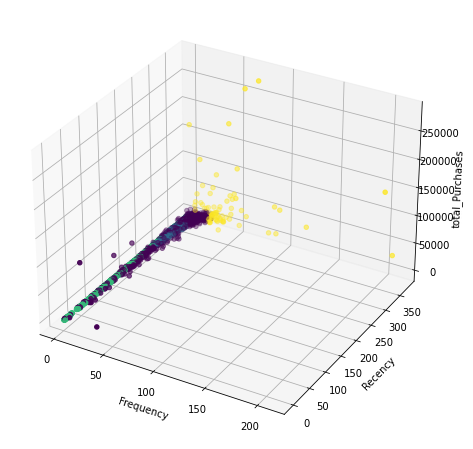

the number of clusters is 5


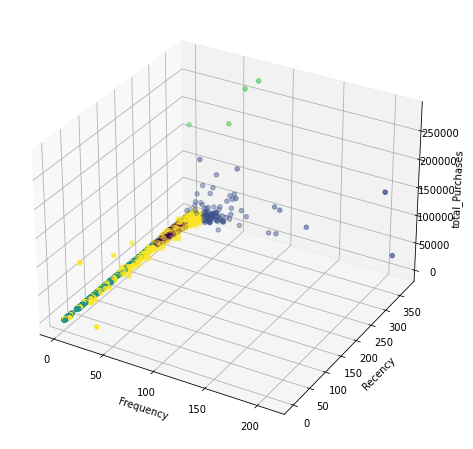

the number of clusters is 6


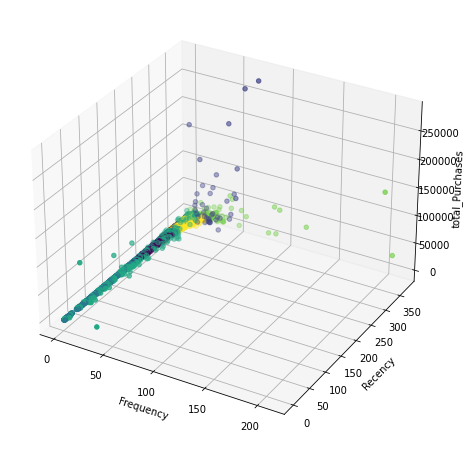

the number of clusters is 7


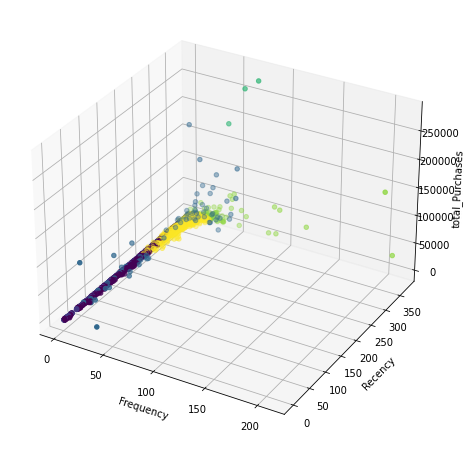

the number of clusters is 8


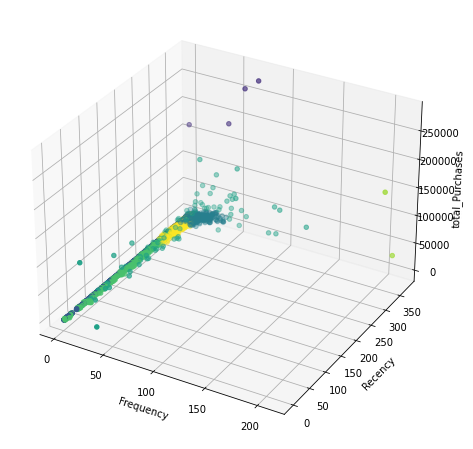

the number of clusters is 9


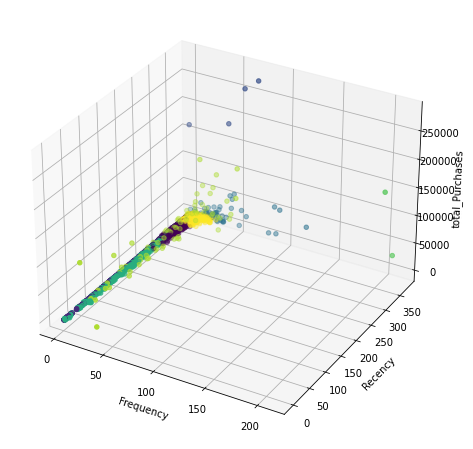

In [65]:
#3D visualization for GMM clustering using different number of clusters.

for i in range (8):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection='3d')

    x =recency_frequency_monetary['frequency']
    z =recency_frequency_monetary['total_purchases']
    y =recency_frequency_monetary['recency']

    ax.scatter(x, y, z, c = gmm_preds[i], marker='o')

    ax.set_xlabel('Frequency')
    ax.set_ylabel('Recency')
    ax.set_zlabel('total_Purchases')
    print('the number of clusters is {}'.format(i+2))
    plt.show()

# Concluson

Here I tuned several unsupervised learning models including KMeans, Hierarchical clustering, DBSCAN and GMM to obtain the optimized conditions. Three main features including recency, frequency and monetary (total spending) are extracted from the available information for each customer to reflect their purchasing behavior. Both visualization and silhouette scores confirmed the the grouping the customers to two groups give the best presentation of customers based on their purchasing behaviors.

Here are the highest silhouette scores obtained using different models:

The highest silhouette score for GMM method (components = 2 and covariance type = full) is 0.9785620789864318

The highest silhouette score for DBSCAN method (min_samples = 3 and eps = 8) is 0.9685331804933367

The highest silhouette score for Hierarchical model (2 clusters) is 0.9199425189770076

The highest silhouette score for KMeans model (n_clusters =2) is 0.895861130921858

Through comparing these models I found the GMM as the best performer that resulted in the highest silhouette score.